In [5]:
# Importing necessary packages
import torch
from torchvision import datasets, transforms
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

from MED import MED
from MMD import MMD

### Loading and Pre-processing Data:

In [6]:
# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])  # Converting image to tensor
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)  # Loading train data
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)  # Loading test data

# Preprocess the data
train_X = train_dataset.data.view(train_dataset.data.size(0), -1).numpy()  # Flattening the images
train_y = train_dataset.targets.numpy()  # Converting tensor to numpy array

test_X = test_dataset.data.view(test_dataset.data.size(0), -1).numpy()  # Flattening the images
test_y = test_dataset.targets.numpy()  # Converting tensor to numpy array


# Masking data to extract only class 3 and 4
class1 = 3
class2 = 4
training_mask = (train_y == class1) | (train_y == class2)  # Mask training data
train_X = train_X[training_mask, :]  # Input data (images)
train_y = train_y[training_mask]  # Labels

test_mask = (test_y == class1) | (test_y == class2)  # Mask test data
test_X = test_X[test_mask, :]  # Input data (images)
test_y = test_y[test_mask]  # Labels


# Applying PCA
pca = PCA(n_components=2)
pca.fit(train_X)
train_X = pca.transform(train_X)
test_X = pca.transform(test_X)

### MED Classifier Example:

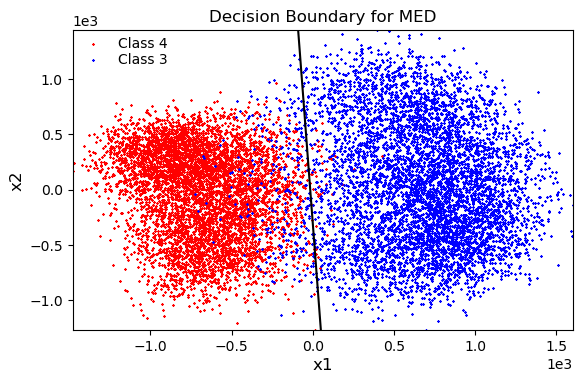

The MED accuracy is: 0.98042


In [7]:
# Instantiating MED object
med_classifier = MED()
med_classifier.fit(train_X, train_y) # Feeding training data
med_classifier.plot_decision_boundary_for2D(train_X, train_y) # Plotting decision boundary

y_pred_med = med_classifier.predict(test_X) # Predicting labels for MED
accuracy_med = np.mean(y_pred_med == test_y) # Evaluating accuracy for MED
print("The MED accuracy is: %0.5f" %(accuracy_med))

### MMD Classifier Example:

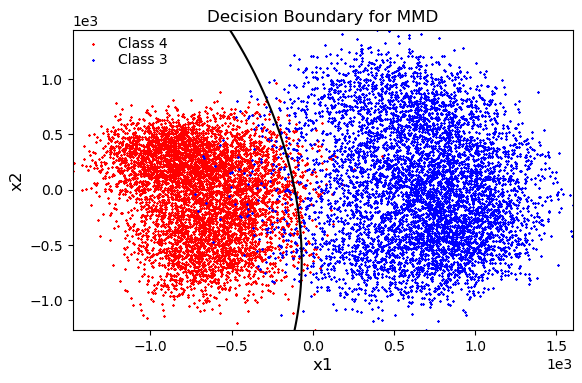

The MMD accuracy is: 0.98143


In [8]:
# Instantiating MMD object
mmd_classifier = MMD()
mmd_classifier.fit(train_X, train_y) # Feeding training data
mmd_classifier.plot_decision_boundary_for2D(train_X, train_y) # Plotting decision boundary

y_pred_mmd = mmd_classifier.predict(test_X) # Predicting labels for MMD
accuracy_mmd = np.mean(y_pred_mmd == test_y) # Evaluating accuracy for MMD
print("The MMD accuracy is: %0.5f" %(accuracy_mmd))